## <center>Supervised Learning</center>

- making inferences from labeled data.

#### 1. Classification (categorical data)
- binary classification (tumor: benign, malignant)
- multiclass classification (books: maths, physics, stats, psychology, etc.)
- example algorithms: KNN, Linear Models, Decision Trees, SVMs, etc.

#### 2. Regression (continuous data)
- predicting income, price of stock, age, and other continous data 
- example algorithms: KNN, Linear Models, Decision Trees, SVMs, etc.
___

Linear models (LinReg, LogReg, Lasso, Ridged, etc) - make predictions according to a linear function of the input features. <br>
Many ML algorithms (including those specified above) can be used for both classification and regression.

In [1]:
# Using LogisticRegression on the cancer dataset. Inspired by Muller and Guido ML book: (https://www.amazon.com/dp/1449369413/)

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2]:
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy on the training subset: 0.955
Accuracy on the test subset: 0.958


**Regularization**:

- prevention of overfitting - (according to Muller and Guido ML book)
- L1 - assumes only a few features are important
- L2 - does not assume only a few features are important - used by default in scikit-learn LogisticRegression
               
**'C'**:

- parameter to control the strength of regularization
- lower C => log_reg adjusts to the majority of data points.
- higher C => correct classification of each data point.

In [3]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.972
Accuracy on the test subset: 0.965


In [4]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.934
Accuracy on the test subset: 0.930


### Linear Models (in general): 

#### <center> y = w * x + b </center>

- w - slope (or coefficient) - accessed via <raw>.coef_</raw>
- b - offset (or intercept) - access via <raw>.intercept_</raw>
- w and b are learned parameters
- y - prediction (decision)

Example (for a dataset with only 1 input features): ŷ = w[0] * x[0] + b 

### For Logistic Regression (specifically):

#### <center> ŷ = w[0] \* x[0] + w[1] \* x[1] + ... + w[p] \* x[p] + b > 0</center>

w[0]: 0.393906  b: -0.031804


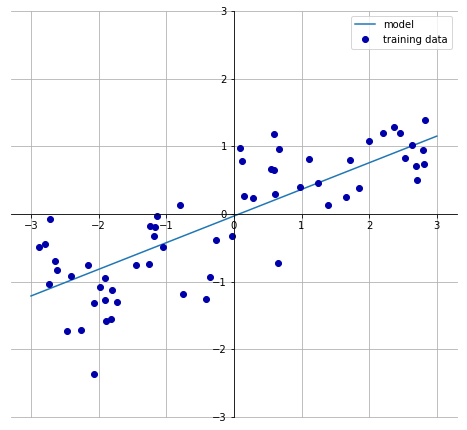

In [6]:
import mglearn # credits to Muller and Guido 2016 (link above)
mglearn.plots.plot_linear_regression_wave()

(569, 30)


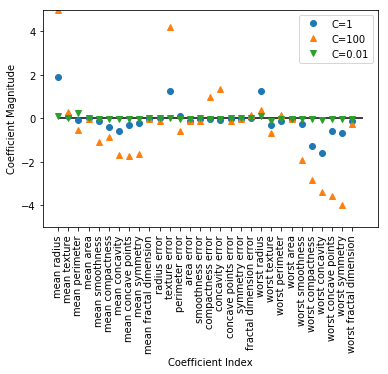

In [7]:
print(cancer.data.shape)

plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()